<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #7: Clasificación y Agrupación
`Fecha de entrega: Octubre 24, 2020. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [10]:
# Cargar datos
data = pd.read_csv(r'D:/NLP/Clase9-17-10-2020/reviews_vidjew_es.csv')
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


# Parte 1: Clasificación

### `[6 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [11]:
#1.Revisar que los datos (clases) esten bien balanceados
data.product_category.value_counts(normalize=True)#normalize true para ver en %

jewelry        0.502
video_games    0.498
Name: product_category, dtype: float64

In [12]:
#2. Dividir el conjunto de datos en 2: training y test. usualmente 80% y20%
from sklearn.model_selection import train_test_split 

 

train, test = train_test_split(data, test_size=0.2, random_state=42)#división de los datos y 42 puede ser cualquiera

 
#tamaño de los dos conjuntos de datos
print(f"El conjunto de datos de entrenamiento tiene {train.shape[0]} registros")
print(f"El conjunto de datos de prueba tiene {test.shape[0]} registros")

El conjunto de datos de entrenamiento tiene 800 registros
El conjunto de datos de prueba tiene 200 registros


###  `[6 pts]` Punto 2: Hacer pre-procesamiento del texto

In [15]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)#favorece que se pueden cambiar los datos

In [16]:
X_train = tfidf_vect.fit_transform(train.review_body.values)#podemos pasar directamente el conjunto de datos gracias a la linea ant
y_train = train.product_category.values

 

X_test = tfidf_vect.transform(test.review_body.values)# no se pone fit para visualizar si el modelo esta corriendo bien
y_test = test.product_category.values

###  `[6 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, u otro.

In [17]:
#librerias de los modelos
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [18]:
# Inicializamos los clasificadores
nb = MultinomialNB()
logreg = LogisticRegression(class_weight='balanced')#ajusta las clases
svm = LinearSVC(class_weight='balanced')

In [19]:
# Entrenamos los modelos
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

###  `[6 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [20]:
#librerias
from sklearn.metrics import accuracy_score, f1_score #exactitud y precisión
from sklearn.metrics import precision_score, recall_score #sensabilidad
from sklearn.metrics import confusion_matrix, classification_report #matriz de confución, reporte de clasificación

 

import matplotlib.pyplot as plt# hacer graficas
from sklearn.metrics import plot_confusion_matrix

In [21]:
# Hacemos las predicciones para los datos de prueba (test)
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [22]:
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")

Naive Bayes:            0.86
Regresión Logística:    0.86
SVM:                    0.84


In [23]:
#otras metricas
metricas = [precision_score, recall_score, f1_score]

 

for metrica in metricas:
    print(metrica.__name__)
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='jewelry'):>15.2f}")
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='jewelry'):>7.2f}")
    print(f"SVM: {metrica(y_test, y_pred_svm, pos_label='jewelry'):>23.2f}")
    print()

precision_score
Naive Bayes:            0.81
Regresión Logística:    0.86
SVM:                    0.82

recall_score
Naive Bayes:            0.95
Regresión Logística:    0.86
SVM:                    0.86

f1_score
Naive Bayes:            0.87
Regresión Logística:    0.86
SVM:                    0.84



###  `[BONUS: 3 pts]` Matriz de confusión

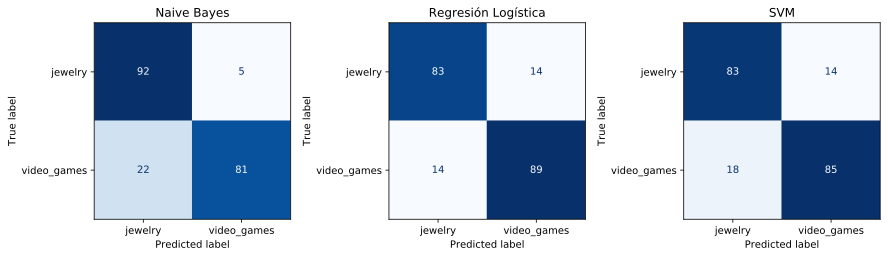

In [24]:
%config InlineBackend.figure_format = 'svg'

 

fig = plt.figure(figsize=(15,15))

 

ax1 = fig.add_subplot(1,3,1)
plot_confusion_matrix(nb, X_test, y_test, cmap = 'Blues', ax=ax1).im_.colorbar.remove()
plt.title("Naive Bayes")

 

ax2 = fig.add_subplot(1,3,2)
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues', ax=ax2).im_.colorbar.remove()
plt.title("Regresión Logística")

 

ax3 = fig.add_subplot(1,3,3)
plot_confusion_matrix(svm, X_test, y_test, cmap = 'Blues', ax=ax3).im_.colorbar.remove() # normalize='true'
plt.title("SVM");

###  `[BONUS: 1 pts]` Términos más importantes de cada categoría

In [33]:
# Resultados
nuevo = ['excelente calidad', 'piedras','funciona muy bien','niveles competitivos']
nuevo_trans = tfidf_vect.transform(nuevo)
print(nb.predict(nuevo_trans))
nb.predict_proba(nuevo_trans)

['jewelry' 'jewelry' 'video_games' 'video_games']


array([[0.57160218, 0.42839782],
       [0.75420502, 0.24579498],
       [0.21465923, 0.78534077],
       [0.42831597, 0.57168403]])

In [34]:
#Explicación

vocab = {value:key for key, value in tfidf_vect.vocabulary_.items()}

In [35]:
sorted(logreg.coef_[0],reverse=True)
# para regresicón logistica logreg 
[(vocab[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(),sorted(logreg.coef_[0]))]

[('calidad', -1.96),
 ('foto', -1.94),
 ('pulsera', -1.87),
 ('bonito', -1.85),
 ('bonitos', -1.84),
 ('bonita', -1.55),
 ('plata', -1.53),
 ('cadena', -1.43),
 ('pequeño', -1.2),
 ('cierre', -1.16),
 ('pendientes', -1.16),
 ('colgante', -1.15),
 ('fina', -1.08),
 ('pequeños', -1.0),
 ('gracias', -0.99),
 ('bonitas', -0.99),
 ('tamaño', -0.89),
 ('demasiado', -0.85),
 ('queda', -0.84),
 ('mujer', -0.82),
 ('preciosa', -0.82),
 ('diseño', -0.8),
 ('collar', -0.79),
 ('grandes', -0.76),
 ('enseguida', -0.74),
 ('grande', -0.73),
 ('recibido', -0.72),
 ('pone', -0.64),
 ('material', -0.63),
 ('corresponde', -0.62),
 ('acabado', -0.61),
 ('roto', -0.6),
 ('aun', -0.6),
 ('ven', -0.6),
 ('piedra', -0.59),
 ('quedan', -0.59),
 ('mala', -0.59),
 ('regalo', -0.57),
 ('pequeña', -0.57),
 ('parece', -0.56),
 ('presentación', -0.56),
 ('niñas', -0.55),
 ('gustan', -0.55),
 ('pesados', -0.55),
 ('precioso', -0.54),
 ('brillo', -0.54),
 ('semana', -0.54),
 ('piedras', -0.53),
 ('pueden', -0.5),
 ('

In [36]:
[(vocab[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(),sorted(logreg.coef_[0]))][-20:]

[('funda', 0.78),
 ('nintendo', 0.8),
 ('ratón', 0.8),
 ('caja', 0.83),
 ('carga', 0.83),
 ('solo', 0.89),
 ('sonido', 0.91),
 ('juegos', 0.92),
 ('mandos', 0.96),
 ('switch', 0.97),
 ('cable', 0.99),
 ('botones', 1.01),
 ('consola', 1.13),
 ('hijo', 1.18),
 ('funciona', 1.2),
 ('ps', 1.26),
 ('jugar', 1.36),
 ('perfecto', 1.36),
 ('mando', 1.94),
 ('juego', 3.61)]

# Parte 2: Agrupación

###  `[6 pts]` Punto 1: Hacer pre-procesamiento del texto

In [42]:
# Cargar datos
data = pd.read_csv(r'D:/NLP/Clase9-17-10-2020/reviews_vidjew_es.csv')

print(f"Tenemos {data.shape[0]}datos.")

data.sample(5)
#data.head()

Tenemos 1000datos.


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
373,es_0571482,product_es_0912206,reviewer_es_0975214,1,"Los palos son muy cortos, no me lo he podido p...",Los palos son muy cortos.,es,jewelry
211,es_0590510,product_es_0826154,reviewer_es_0875376,1,No se especifica claramente los requisitos min...,No viene claro las especificaciones minimas de...,es,video_games
149,es_0002139,product_es_0625860,reviewer_es_0372516,1,Mide 13 cm. y no 21 como ofertan. Por ello lo ...,Mide menos de lo que ofertan,es,jewelry
911,es_0141033,product_es_0825528,reviewer_es_0532950,2,Muy lenta la entrega,Lento,es,jewelry
993,es_0517918,product_es_0644361,reviewer_es_0185270,3,"Es un juego para pasar el rato,de esos que te ...",Ni fu ni fa,es,video_games


In [49]:
#preprocesamiento de datos
import re

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
 
def pre_procesado(texto):

     texto = texto.lower()

     texto = re.sub(r"[\W\d_]+", " ", texto)
     
     texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])

     return texto
 
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

tfidf = tfidf_vect.fit_transform(data.review_body.values)

tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())

In [50]:
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

###  `[6 pts]` Punto 2: Método del codo para determinar $K$

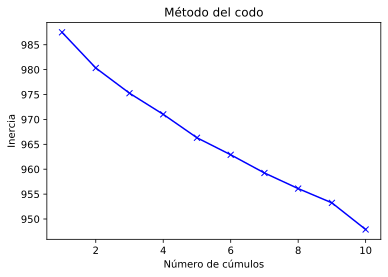

In [51]:
ks = []

k_inertia = []
 
for k in range(1,11):

     kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
     ks.append(k)
     k_inertia.append(kmeans.inertia_)


plt.xlabel('Número de cúmulos')

plt.ylabel("Inercia")

plt.title("Método del codo")

plt.plot(ks, k_inertia, 'bx-')

Calculando para k=1
Calculando para k=2
Calculando para k=3
Calculando para k=4
Calculando para k=5
Calculando para k=6
Calculando para k=7
Calculando para k=8
Calculando para k=9
Calculando para k=10


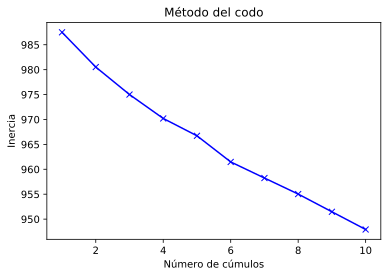

In [52]:
#codigo compañero
ks = []

k_inertia = []
 


for k in range(1,11):

    print(f"Calculando para k={k}")

    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)

    ks.append(k)

    k_inertia.append(kmeans.inertia_)


plt.xlabel('Número de cúmulos')

plt.ylabel("Inercia")

plt.title("Método del codo")

plt.plot(ks, k_inertia, 'bx-')

###  `[6 pts]` Punto 3: Entrenar modelo con el $K$ escogido

In [72]:
k = 6

model = KMeans(n_clusters=k)

model.fit(tfidf_matrix)
nbrs = NearestNeighbors(n_neighbors=3, metric="euclidean").fit(tfidf_matrix.values)

In [73]:
data['cluster'] = model.labels_


model.cluster_centers_

array([[ 3.97743532e-03, -1.51788304e-18,  1.08420217e-19, ...,
         2.16840434e-19,  8.98915197e-04, -1.08420217e-18],
       [-2.05998413e-18,  8.65967566e-03,  1.08420217e-19, ...,
        -5.42101086e-19,  2.06222423e-03, -3.46944695e-18],
       [ 9.77751903e-04,  1.53956708e-17,  6.43973131e-04, ...,
         5.84916827e-04,  3.81183228e-03,  2.36800947e-03],
       [-1.51788304e-18, -1.51788304e-18,  1.08420217e-19, ...,
         0.00000000e+00,  4.33680869e-19, -1.73472348e-18],
       [ 7.58941521e-19, -1.08420217e-18,  1.08420217e-19, ...,
        -3.25260652e-19,  4.33680869e-19,  5.15015319e-03],
       [ 8.67361738e-19, -1.08420217e-18,  1.08420217e-19, ...,
        -3.25260652e-19,  4.33680869e-19,  2.16840434e-19]])

In [74]:
data['cluster'] = model.labels_
clust_cnt = data['cluster'].value_counts()#cuantos valores hay en cada uno de los clusters
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

centroides = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()
 
print(f"CLUSTERS:\n")
for i in range(k):
     print(f"Cluster #{i}")
     print(f"{clust_cnt[i]} textos ({clust_cnt_pct[i]:.2%} de los datos)")
     print(f"TERMINOS: ", end=" ")
     for idx in order_centroids[i, :15]:
         print(f"{terms[idx]}", end=" ")
     print("\n")
     print(f"Textos Representativos")

     for texto in data.iloc[nbrs.kneighbors([centroides[i]])[1][0]]['review_body'].values:
         print(f"* {texto}")
     print("\n")

CLUSTERS:

Cluster #0
120 textos (12.00% de los datos)
TERMINOS:  bien precio cadena bonito si regalo quedan producto queda bastante mas dos funciona colgante imagen 

Textos Representativos
* Está bien por su precio
* Por el precio que tiene está muy bien
* Esta bien,fue un regalo


Cluster #1
168 textos (16.80% de los datos)
TERMINOS:  juego bonito regalo hijo queda español pequeño encantado esperaba encantó bonita jugar viene rápido tal 

Textos Representativos
* Esperaba más del juego.
* El juego es muy bonito pero no está en español tal y como reseña
* Es un juego bonito y divertido, pero es que tiene excesivas paradas, me corta mucho el juego , está bien , pero..


Cluster #2
463 textos (46.30% de los datos)
TERMINOS:  producto si mas bonitos foto mando buen solo pequeños plata aunque grandes parece mejor mal 

Textos Representativos
* Demasiado pequeños, en la foto parecían mas grandes
* Excelente producto son muy bonitos
* Llega así tal se ve en la foto. Solo una pieza y parece

In [76]:
#renombrar clusters

clusters = {0:'buen_precio',
             1:'no_satisdechos_juego',
             2:'inconformidad',
             3:'calidad_precio',
             4:'producto_perfecto',
             5:'inconformes'}
 
data['cluster_name'] = data['cluster'].apply(lambda val: clusters[val])

data['texto_peq'] = data['review_body'].apply(lambda texto: texto[:100])
 
data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster,cluster_name,texto_peq
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,3,calidad_precio,"Buen. Buena calidad, y buena presentación."
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,4,producto_perfecto,"Un producto a perfecto, para salir de casa con..."
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,2,inconformidad,No funciona con Nintendo Switch. No hay forma ...
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,0,buen_precio,"Recomendado, los utilizo para pc y no me dan n..."
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,0,buen_precio,El cable funciona bien podria ser un poco mas ...
...,...,...,...,...,...,...,...,...,...,...,...
995,es_0427672,product_es_0899883,reviewer_es_0474735,2,En la foto parece que la cadena sea más gruesa...,Cadena muy fina,es,jewelry,0,buen_precio,En la foto parece que la cadena sea más gruesa...
996,es_0059540,product_es_0702564,reviewer_es_0754753,3,"Bien por su precio, la cadena demasiado fina.",E,es,jewelry,0,buen_precio,"Bien por su precio, la cadena demasiado fina."
997,es_0303349,product_es_0678671,reviewer_es_0172313,5,Muy bien!! Ahora tengo organizados los pendien...,Bonito,es,jewelry,0,buen_precio,Muy bien!! Ahora tengo organizados los pendien...
998,es_0659961,product_es_0294943,reviewer_es_0554554,4,"Las tapas para los joystics no están nada mal,...",No está mal pero sólo he probado las fundas.,es,video_games,2,inconformidad,"Las tapas para los joystics no están nada mal,..."


###  `[BONUS: 3 pts]` Visualización usando PCA

In [77]:
#importar librerias
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [79]:
pca = PCA(n_components=2)
 
result = pca.fit_transform(tfidf_matrix)

result = pd.DataFrame(result)

result.columns = ['X', 'Y']

result['cluster'] = data.cluster.values

result['texto'] = data.texto_peq.values
 
trace = go.Scatter(x=result['X'].values,

                    y=result['Y'].values,

                    text=result['texto'].values,

                    mode='markers',

                    marker=dict(color=result['cluster'].values)) 
 
layout = go.Layout(title="PCA")
 
fig = go.Figure(data=trace, layout=layout)

iplot(fig)

# Parte 3: Comparación

### `[6 pts]` Punto 1: Hacer predicción para estas dos frases de los dos modelos

In [22]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
# transformar con tfidf usado para clasificación
# transformar con tfidf usado para agrupación

# resultado para clasificación
# resultado para agrupación

['video_games' 'jewelry']
[1 2]


### `[2 pts]` Punto 2: Preguntas

- ¿A cuál modelo le fue mejor?
Se observan mejores resultados en el modelo  de clasificación, pero los resultados del K-Means tambien pueden ser muy utiles.
- ¿Cuál modelo se demoró más en entrenar? 
K-means
- Según los resultados del $K$-Means, ¿cuál es la estructura latente de los datos?
Es una estructura de texto aparentemente con las frases o comentarios mas frecuentes.
- ¿Alguna otra observación?
Me gusto el modelo de K-Means porque logra hacer la agrupación de los comentarios similares y eso le sería muy util a una empresa, le permitiría conocer que pienzan los clientes de X producto o servicio. Es algo parecido lo que espero poder hacer con una base de datos de PQRS